In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PICIGS youth unemployment

In [2]:
# read data
df = pd.read_csv('../data/estat_une_rt_m.csv')

In [3]:
# set code as index
df.set_index('freq;s_adj;age;unit;sex;geo\TIME_PERIOD', inplace=True)

In [4]:
# convert column names into datetime
df.columns = df.columns.to_series().apply(lambda s: pd.to_datetime(s.strip(), format='%Y-%m'))

In [5]:
# filter to: from January 2010 to January 2016 
df = df.loc[:,'2008-01':'2016-12']

In [6]:
country_codes = {
    'Portugal': 'PT',
    'Ireland': 'IE',
    'Cyprus': 'CY',
    'Italy': 'IT',
    'Greece': 'EL',
    'Spain': 'ES',
    'EU': 'EU27_2007' # 27 countries (EU 2007-2013)
}

In [7]:
def filter_seasonally_adjusted(index):
    return index.to_series().apply(lambda s: s.split(';')[1] == 'SA')

df = df[filter_seasonally_adjusted(df.index)]

In [8]:
def filter_youth(index):
    return index.to_series().apply(lambda s: s.split(';')[2] == 'Y_LT25')

df = df[filter_youth(df.index)]

In [9]:
def filter_unit(index):
    return index.to_series().apply(lambda s: s.split(';')[3] == 'PC_ACT')

df = df[filter_unit(df.index)]

In [10]:
def filter_sex(index):
    return index.to_series().apply(lambda s: s.split(';')[4] == 'T')

df = df[filter_sex(df.index)]

In [11]:
def filter_picigs(index):
    return index.to_series().apply(lambda s: s.split(';')[-1] in country_codes.values()
                                  and s.split(';')[-1] != 'EU27_2007')

piigs = df[filter_picigs(df.index)]
piigs = piigs.astype(float)
print(f'Average unemployment in PICIGS between 01/2010 and 01/2016 is {np.round(piigs.mean().mean(),2)} %.')

Average unemployment in PICIGS between 01/2010 and 01/2016 is 33.5 %.


In [12]:
def filter_countries(index):
    return index.to_series().apply(lambda s: s.split(';')[-1] in country_codes.values())

df = df[filter_countries(df.index)]

In [13]:
df = df.astype(float)

In [14]:
unemployment_df = pd.DataFrame(
    data = np.hstack(
            [df.loc[:,f'{year}-01':f'{year}-12'].mean(axis=1).to_numpy().reshape(-1,1)
            for year in np.arange(2008,2017)]
        ),
    index = df.index,
    columns = pd.to_datetime(np.arange(2008,2017), format='%Y')
)

In [15]:
unemployment_df

,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01
freq;s_adj;age;unit;sex;geo\TIME_PERIOD,,,,,,,,,
M;SA;Y_LT25;PC_ACT;T;CY,8.950000,13.850000,16.475000,22.125000,27.925000,38.800000,36.375000,32.600000,29.125000
M;SA;Y_LT25;PC_ACT;T;EL,21.850000,25.716667,32.866667,44.625000,55.466667,58.241667,52.725000,49.816667,47.175000
M;SA;Y_LT25;PC_ACT;T;ES,24.500000,37.733333,41.491667,46.216667,52.900000,55.458333,53.208333,48.316667,44.425000
M;SA;Y_LT25;PC_ACT;T;EU27_2007,15.941667,20.308333,21.316667,21.725000,23.175000,23.625000,22.058333,20.200000,18.575000
M;SA;Y_LT25;PC_ACT;T;IE,13.508333,24.516667,28.191667,29.658333,30.783333,26.758333,23.458333,20.291667,16.791667
M;SA;Y_LT25;PC_ACT;T;IT,21.408333,25.316667,27.816667,29.233333,35.175000,40.175000,42.650000,40.258333,37.675000
M;SA;Y_LT25;PC_ACT;T;PT,21.575000,25.341667,28.191667,30.158333,38.008333,38.108333,34.675000,31.958333,28.200000


In [16]:
labels = ['Cyprus', 'Greece', 'Spain', 'EU', 'Ireland', 'Italy', 'Portugal']
markers = ['1','o', '+', '^', 'v', 's', '*']

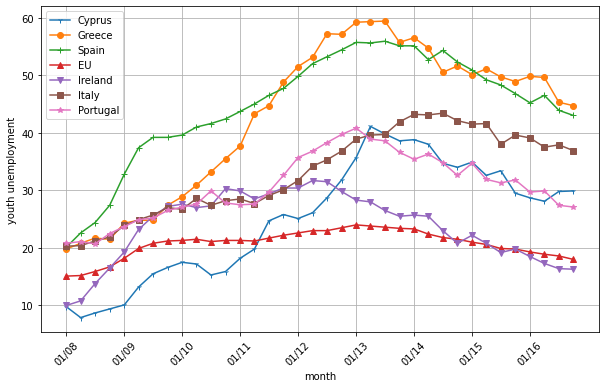

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

for i,series in df.reset_index(drop=True).iterrows():
    ax.plot(series[::3], marker=markers[i], label=labels[i])

_ = ax.set_xticks(series.index[::12])
_ = ax.set_xticklabels(series.index[::12].to_series().apply(lambda s: pd.to_datetime(s).strftime('%m/%y')), rotation=45)

ax.set_ylabel('youth unemployment')
ax.set_xlabel('month')
ax.legend(loc='upper left')
ax.grid()

#fig.savefig('../figures/picigs-youth_unemployment.png')

# Greece: emmigration

In [18]:
# read data
df = pd.read_csv('../data/ELSTAT-greece-emigration.csv', index_col=0)

In [19]:
df = pd.DataFrame(
    data=np.vectorize(lambda s: s.replace(',',''))(df.values.flatten()).reshape(df.shape).astype(int),
    index=df.index,
    columns=df.columns.to_series().apply(lambda s: pd.to_datetime(s, format='%Y'))
)

In [20]:
twennies = df.loc[:,'2008':'2016'].iloc[5:7].sum()
rest = df.loc[:,'2008':'2016'].iloc[np.r_[1:5,7:19]].sum()

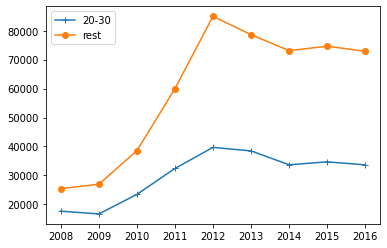

In [21]:
fig, ax = plt.subplots()

ax.plot(twennies, marker='+', label='20-30')
ax.plot(rest, marker='o', label='rest')
ax.legend(loc='upper left')

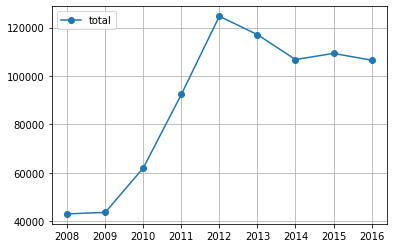

In [22]:
fig, ax = plt.subplots()

ax.plot(df.loc['TOTAL','2008':'2016'], marker='o', label='total')
ax.legend(loc='upper left')
ax.set_yticks(np.arange(40000,120001,20000))
ax.grid()

In [23]:
emmigration_series = df.loc['TOTAL','2008':'2016'].copy()

# Trust in the ECB

In [24]:
# read data
df = pd.read_csv('../data/estat_sdg_16_60.csv', index_col=0)

In [25]:
# convert columns to datetime
df.columns = df.columns.to_series().apply(lambda s: pd.to_datetime(s.strip(), format='%Y'))

In [26]:
# filter to 2008-2016
df = df.loc[:,'2008':'2016']

In [27]:
# filter to ECB
df = df[df.index.to_series().apply(lambda s: s.split(';')[2] == 'ECB')]

In [28]:
picigs = {
    'Portugal': 'PT',
    'Ireland': 'IE',
    'Cyprus': 'CY',
    'Italy': 'IT',
    'Greece': 'EL',
    'Spain': 'ES',
}

eu = {
    # picigs
    'Portugal': 'PT',
    'Ireland': 'IE',
    'Cyprus': 'CY',
    'Italy': 'IT',
    'Greece': 'EL',
    'Spain': 'ES',  
    # rest
    'Austria': 'AT',
    'Belgium': 'BE',
    'Bulgaria': 'BG',
    'Czechia': 'CZ',
    'Denmark': 'DK',
    'Estonia': 'EE',
    'Finland': 'FI',
    'France': 'FR',
    'Germany': 'DE',
    'Hungary': 'HU',
    'Latvia': 'LV',
    'Lithuania': 'LT',
    'Luxembourg': 'LU',
    'Malta': 'MT',
    'Netherlands': 'NL',
    'Poland': 'PL',
    'Romania': 'RO',
    'Slovakia': 'SK',
    'Slovenia': 'SI',
    'Sweden': 'SE',
    'United Kingdom': 'UK'
}

In [29]:
# drop non-EU states and EU mean
df = df[df.index.to_series().apply(lambda s: s.split(';')[-1] in eu.values())]

In [30]:
df = df.astype(float)

In [31]:
trust_eu_series = df.mean()
trust_picigs_series = df[df.index.to_series().apply(lambda s: s.split(';')[-1] in picigs.values())].mean()
trust_greece_series = df[df.index.to_series().apply(lambda s: s.split(';')[-1] == 'EL')].T.iloc[:,0]

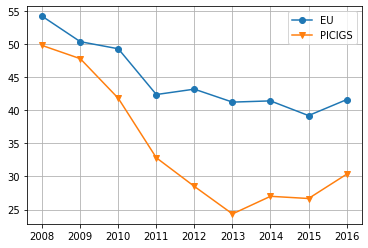

In [32]:
fig, ax = plt.subplots()

ax.plot(trust_eu_series, label='EU', marker='o')
ax.plot(trust_picigs_series, label='PICIGS', marker='v')

#_ = ax.set_xticks(series.index[::12])
#_ = ax.set_xticklabels(series.index[::12].to_series().apply(lambda s: pd.to_datetime(s).strftime('%m/%y')), rotation=45)

#ax.set_ylabel('youth unemployment')
#ax.set_xlabel('month')
ax.legend(loc='upper right')
ax.grid()

#fig.savefig('../figures/piigs-youth_unemployment.png')

# Greece: electoral rise of Golden Dawn

In [33]:
hellenic_parliament = pd.Series(
    data=[0.3, 7, 6.9, 6.4, 7],
    index=pd.to_datetime(['10/09', '05/12', '06/12', '01/15', '09/15'], format='%m/%y')
)

eu_parliament = pd.Series(
    data=[0.5, 9.4],
    index=pd.to_datetime(['06/09', '05/14'], format='%m/%y')
)

In [34]:
xticks = np.sort(np.unique(np.concatenate((hellenic_parliament.index.to_numpy(), eu_parliament.index.to_numpy()))))

In [36]:
xticks = np.delete(xticks, 2)

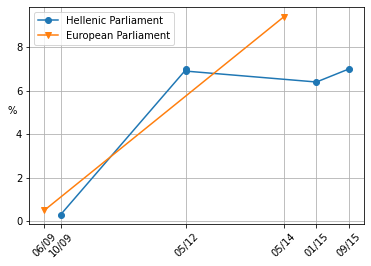

In [36]:
fig, ax = plt.subplots()

ax.plot(hellenic_parliament, marker='o', label='Hellenic Parliament')
ax.plot(eu_parliament, marker='v', label='European Parliament')


_ = ax.set_xticks(xticks)
_ = ax.set_xticklabels(pd.Series(xticks).apply(lambda s: pd.to_datetime(s).strftime('%m/%y')), rotation=45)

ax.set_ylabel('%', rotation='horizontal')
ax.legend()
ax.grid()

# Combined

In [37]:
sorted_labels = ['Cyprus','Portugal', 'Ireland', 'Italy', 'Greece', 'Spain', 'EU']
unemployment_df = unemployment_df.set_index(pd.Index(labels)).reindex(sorted_labels)

In [38]:
sorted_markers = ['*', 'v', 's', 'o', '+', '^']

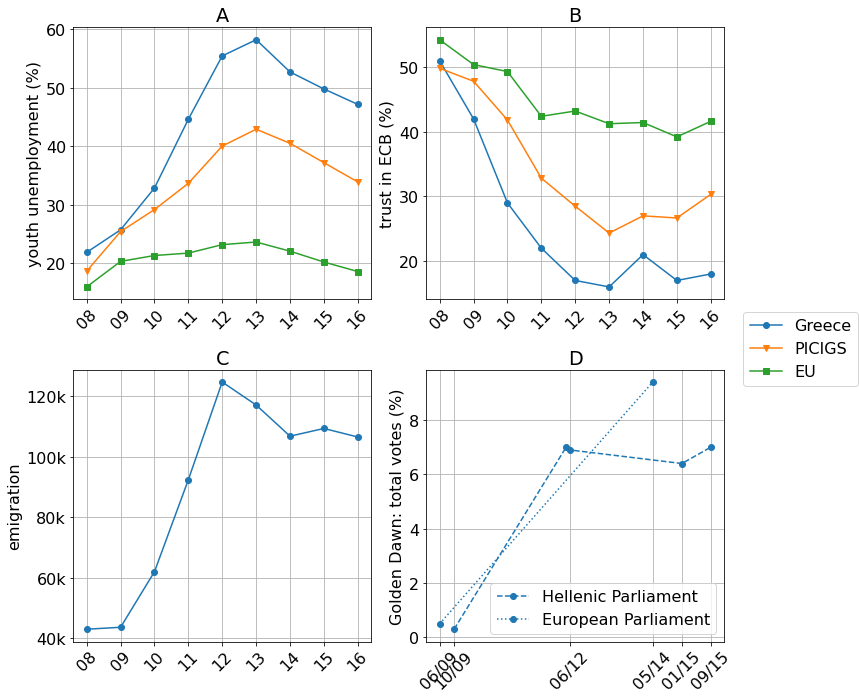

In [47]:
plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(2, 2, figsize=(12,10))
lines = []
line_labels = []

#ax1 = plt.subplot2grid((3,2), (0,0), colspan=2)
#ax2 = plt.subplot2grid((3,2), (1,0), colspan=2)
#ax3 = axes[2,0]
#ax4 = axes[2,1]

ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]

#############################
### A: youth unemployment ###
#############################

# greece
l, = ax1.plot(unemployment_df[unemployment_df.index == 'Greece'].T, marker='o', label='Greece')
lines.append(l)
line_labels.append('Greece')
# picigs
l, = ax1.plot(unemployment_df[unemployment_df.index != 'EU'].mean(), marker='v', label='PICIGS')
lines.append(l)
line_labels.append('PICIGS')
# EU
l, = ax1.plot(unemployment_df[unemployment_df.index == 'EU'].T, marker='s', label='EU')
lines.append(l)
line_labels.append('EU')


_ = ax1.set_xticks(unemployment_df.columns)
_ = ax1.set_xticklabels(unemployment_df.columns.to_series().apply(lambda s: s.strftime('%y')), rotation=45)

ax1.set_ylabel('youth unemployment (%)', rotation='vertical')
#ax1.legend(loc='upper left')
ax1.grid()

ax1.set_title('A')

#######################
### B: trust in ECB ###
#######################

ax2.plot(trust_greece_series, label='Greece', marker='o', color='C0')
ax2.plot(trust_eu_series, label='EU', marker='s', color='C2') # keep marker and color consistent with ax1 and ax2
ax2.plot(trust_picigs_series, label='PICIGS', marker='v', color='C1') # use so far unused color because new entity
#lines.append(l)
#line_labels.append('PIIGS')

_ = ax2.set_xticks(trust_eu_series.index)
_ = ax2.set_xticklabels(trust_eu_series.index.to_series().apply(lambda s: s.strftime('%y')), rotation=45)
#_ = ax3.set_yticks(np.arange(30,51,10))
#_ = ax3.set_yticklabels(['40k','60k','80k','100k','120k'])

ax2.set_ylabel('trust in ECB (%)', rotation='vertical')
#ax3.legend(loc='upper right')
ax2.grid()

ax2.set_title('B')

#############################
### C: greece emmigration ###
#############################

l, = ax3.plot(emmigration_series, marker='o', label='Greece', color='C0') # keep marker and color consistent with ax1
# don't add to legend because already present

_ = ax3.set_xticks(emmigration_series.index)
_ = ax3.set_xticklabels(emmigration_series.index.to_series().apply(lambda s: s.strftime('%y')), rotation=45)
_ = ax3.set_yticks(np.arange(40000,120001,20000))
_ = ax3.set_yticklabels(['40k','60k','80k','100k','120k'])

ax3.set_ylabel('emigration', rotation='vertical')
#ax3.legend(loc='upper left')
ax3.grid()

ax3.set_title('C')

########################################
### D: electoral rise of golden dawn ###
########################################

ax4.plot(hellenic_parliament, marker='o', color='C0', linestyle='dashed', label='Hellenic Parliament')
ax4.plot(eu_parliament, marker='o', color='C0', linestyle='dotted', label='European Parliament')


_ = ax4.set_xticks(xticks)
_ = ax4.set_xticklabels(pd.Series(xticks).apply(lambda s: pd.to_datetime(s).strftime('%m/%y')), rotation=45)

ax4.set_ylabel('Golden Dawn: total votes (%)', rotation='vertical')
ax4.legend()
ax4.grid()

ax4.set_title('D')

#########################
### figure aesthetics ###
#########################

# shared legend
fig.legend(handles=lines,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           #title="Legend Title"  # Title for the legend
           )

fig.tight_layout()

fig.subplots_adjust(right=0.85)

fig.savefig('../figures/figure1.png')